In [ ]:
!pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
train=pd.read_csv('/content/C&T train dataset.csv')

In [ ]:
test=pd.read_csv('/content/C&T test dataset.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [ ]:
train.isnull().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [ ]:
train['age'].fillna(train['age'].mean(),inplace=True)

In [ ]:
train['employment_st'].fillna(train['employment_st'].mode()[0],inplace=True)

In [ ]:
train['poi'].fillna(train['poi'].mode()[0],inplace=True)

In [ ]:
train['gurantors'].fillna(train['gurantors'].mode()[0],inplace=True)

In [ ]:
train['housing_type'].fillna(train['housing_type'].mode()[0],inplace=True)

In [ ]:
train.drop(['sno'],axis =1,inplace=True)

In [ ]:
train.isnull().sum()

acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

In [ ]:
train['poi'] = train['poi'].astype('int64')

In [ ]:
train['age'] = train['age'].astype('int64')

In [ ]:
train['duration_month'].skew()

1.1491584983468024

In [ ]:
train['poi'].skew()


-0.5250462230929299

In [ ]:
train['resident_since'].skew()

-0.2772524217658586

In [ ]:
train['age'].skew()

1.0629437654187404

In [ ]:
train['credits_no'].skew()

1.2676295172023333

In [ ]:
train['liables'].skew()

1.9918718994922635

In [ ]:
train['Group_no'].skew()

-0.12348600626159943

<Axes: >

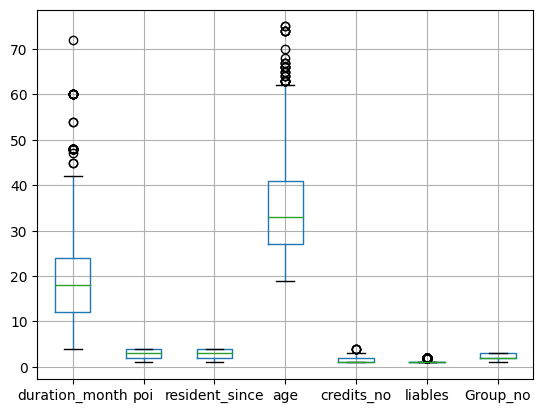

In [ ]:
train.boxplot()

<Axes: xlabel='Group_no'>

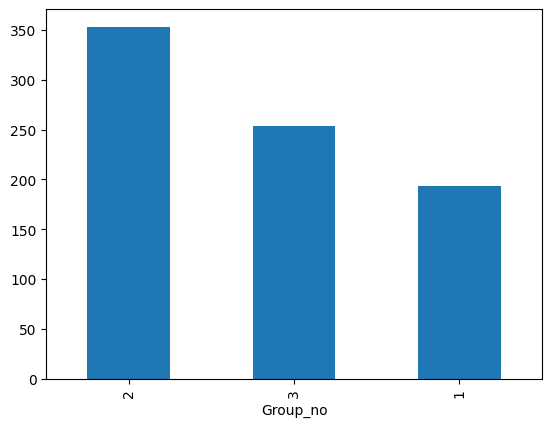

In [ ]:
train['Group_no'].value_counts().plot(kind = 'bar')

In [ ]:
train['Group_no'].value_counts()

Group_no
2    353
3    254
1    193
Name: count, dtype: int64

# **DATA VISUALIZATION**

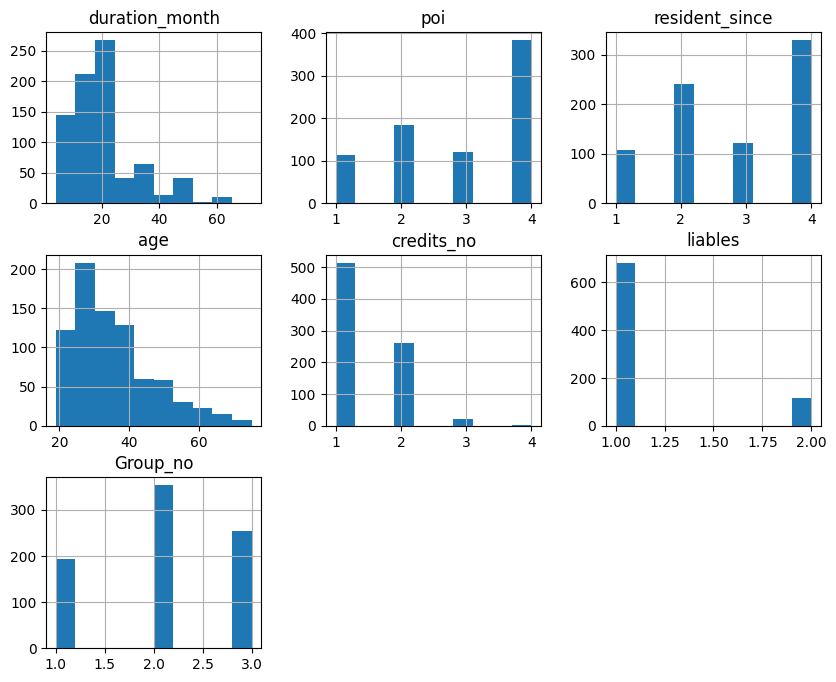

In [ ]:
train.hist(bins=10, figsize=(10,8))
plt.show()

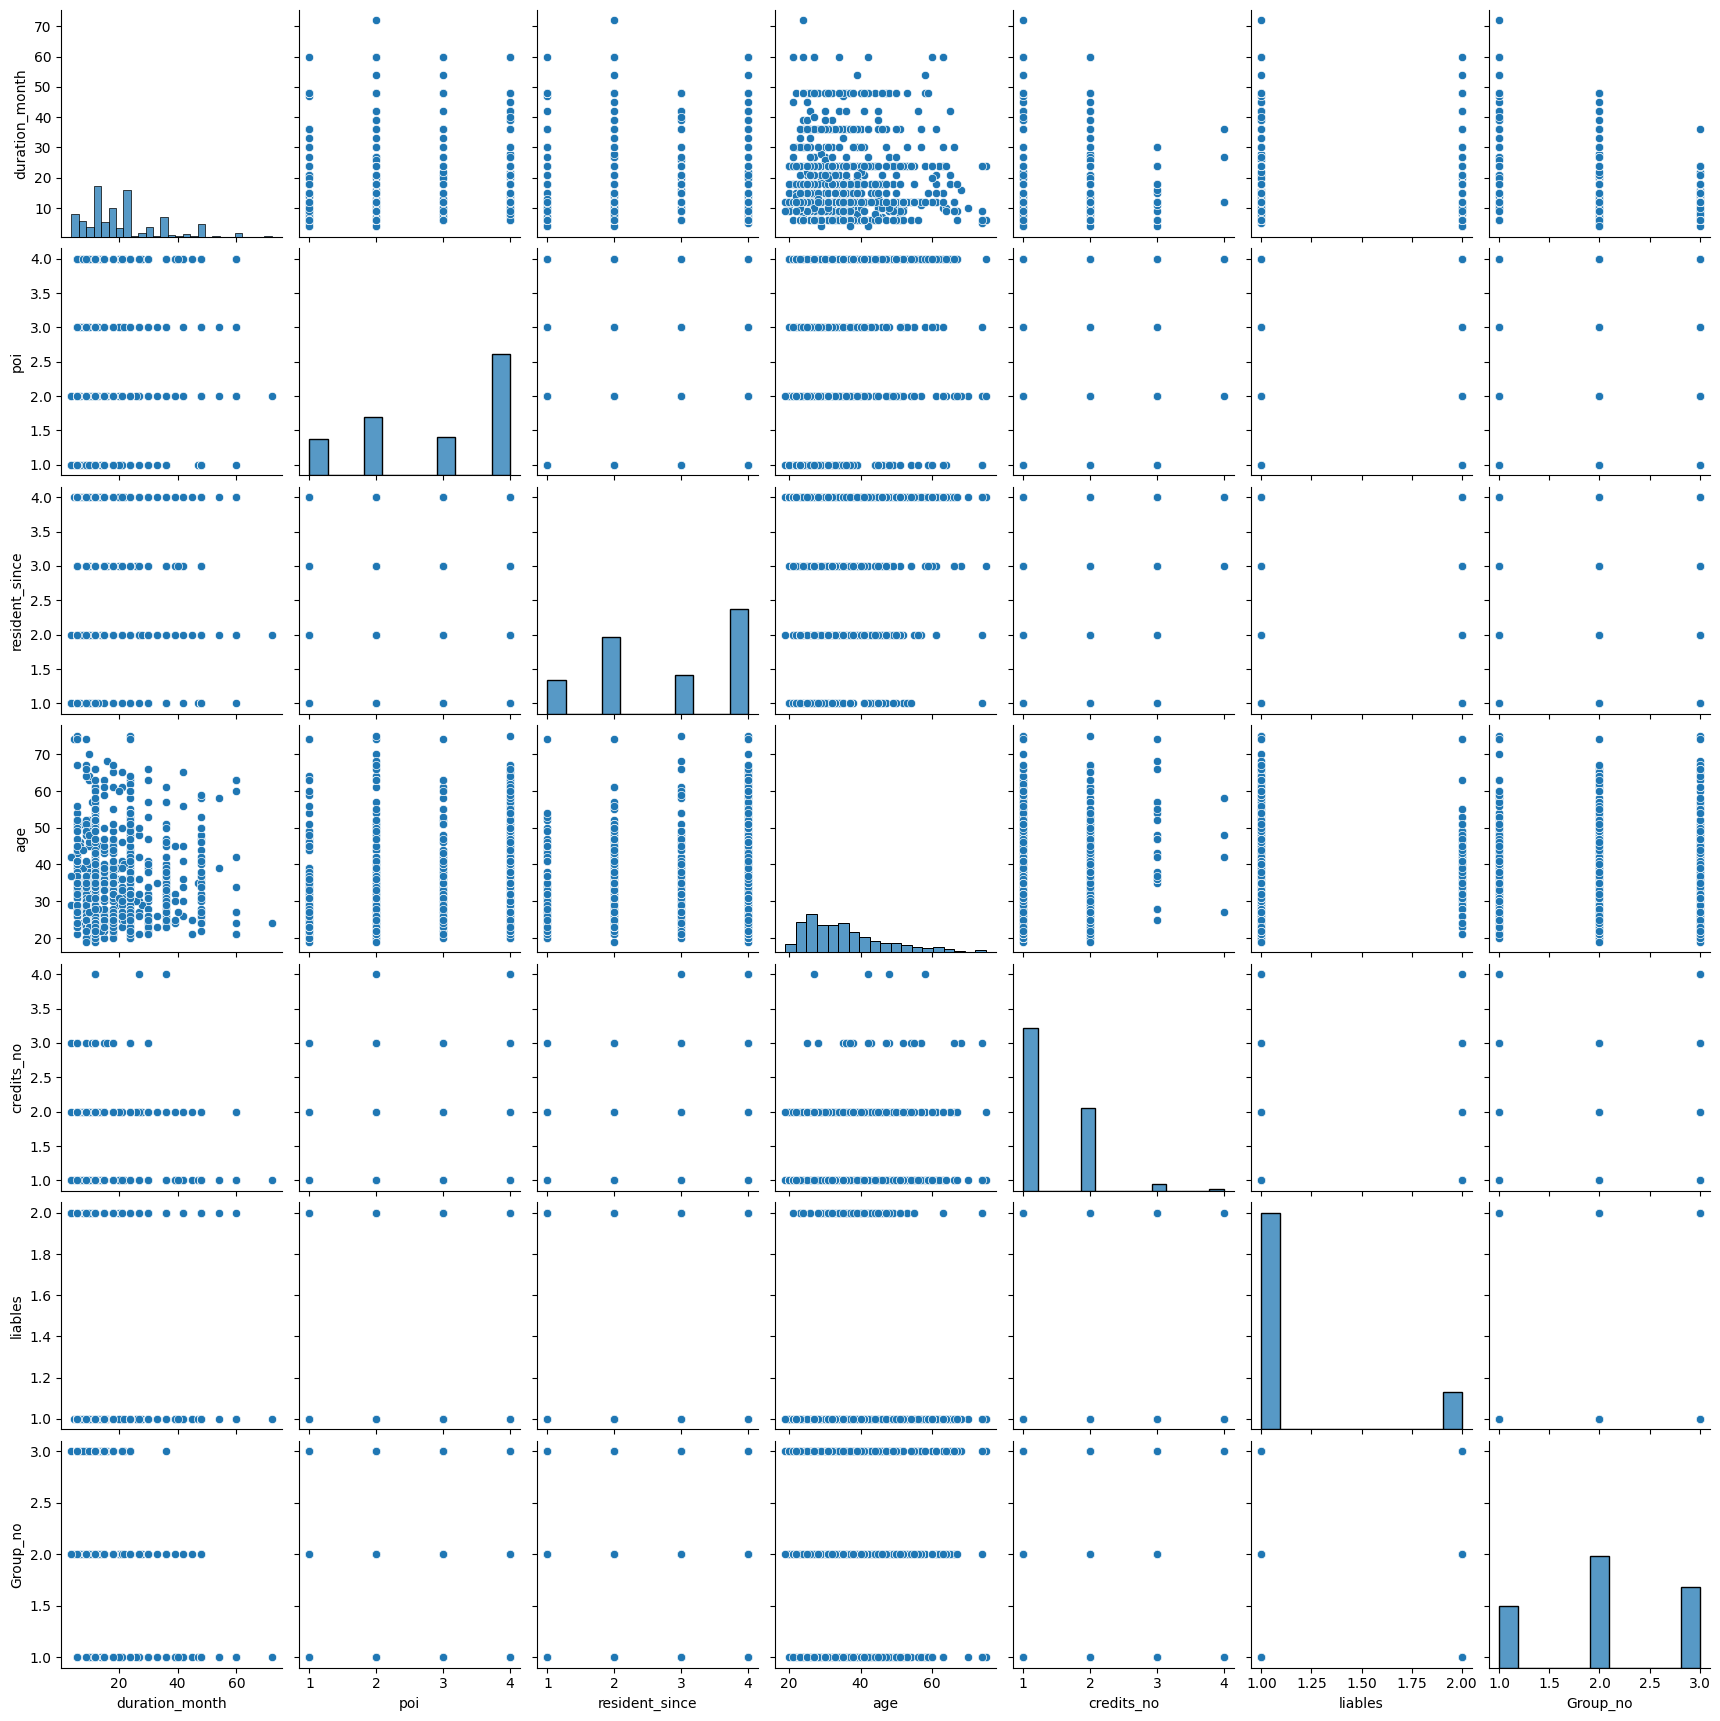

In [ ]:
sns.pairplot(train)

In [ ]:
specified_columns = ['account_info', 'credit_history', 'purpose', 'savings_account', 'employment_st', 'personal_status','gurantors', 'resident_since', 'property_type','installment_type', 'housing_type', 'credits_no', 'job_type','telephone','foreigner']

missing_columns = [col for col in specified_columns if col not in train.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")

Missing columns: ['account_info', 'savings_account']


In [ ]:
# Drop missing columns from the specified list
specified_columns = [col for col in specified_columns if col in train.columns]

# Perform one-hot encoding
train = pd.get_dummies(train, columns=specified_columns)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   acc_info               800 non-null    object
 1   duration_month         800 non-null    int64 
 2   savings_acc            800 non-null    object
 3   poi                    800 non-null    int64 
 4   age                    800 non-null    int64 
 5   liables                800 non-null    int64 
 6   Group_no               800 non-null    int64 
 7   credit_history_A30     800 non-null    bool  
 8   credit_history_A31     800 non-null    bool  
 9   credit_history_A32     800 non-null    bool  
 10  credit_history_A33     800 non-null    bool  
 11  credit_history_A34     800 non-null    bool  
 12  purpose_A40            800 non-null    bool  
 13  purpose_A41            800 non-null    bool  
 14  purpose_A410           800 non-null    bool  
 15  purpose_A42            

In [ ]:
train

,acc_info,duration_month,savings_acc,poi,age,liables,Group_no,credit_history_A30,credit_history_A31,credit_history_A32,...,credits_no_3,credits_no_4,job_type_A171,job_type_A172,job_type_A173,job_type_A174,telephone_A191,telephone_A192,foreigner_A201,foreigner_A202
0,A11,6,A65,4,67,1,3,False,False,False,...,False,False,False,False,True,False,False,True,True,False
1,A12,48,A61,2,22,1,1,False,False,True,...,False,False,False,False,True,False,True,False,True,False
2,A14,12,A61,2,49,2,2,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3,A11,42,A61,2,45,2,1,False,False,True,...,False,False,False,False,True,False,True,False,True,False
4,A11,24,A61,3,53,2,1,False,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,A14,9,A62,2,22,1,2,False,False,True,...,False,False,False,False,True,False,True,False,True,False
796,A11,18,A65,1,51,2,1,False,False,True,...,False,False,False,False,True,False,False,True,True,False
797,A14,12,A61,2,22,1,3,False,False,False,...,False,False,False,True,False,False,True,False,True,False
798,A14,24,A65,4,54,1,3,False,False,False,...,False,False,False,False,True,False,False,True,True,False


In [ ]:
x = train.drop(['Group_no'],axis=1)
y = train['Group_no']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   acc_info               800 non-null    object
 1   duration_month         800 non-null    int64 
 2   savings_acc            800 non-null    object
 3   poi                    800 non-null    int64 
 4   age                    800 non-null    int64 
 5   liables                800 non-null    int64 
 6   Group_no               800 non-null    int64 
 7   credit_history_A30     800 non-null    bool  
 8   credit_history_A31     800 non-null    bool  
 9   credit_history_A32     800 non-null    bool  
 10  credit_history_A33     800 non-null    bool  
 11  credit_history_A34     800 non-null    bool  
 12  purpose_A40            800 non-null    bool  
 13  purpose_A41            800 non-null    bool  
 14  purpose_A410           800 non-null    bool  
 15  purpose_A42            

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x = x.apply(le.fit_transform)

In [ ]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(847, 59)
(212, 59)
(847,)
(212,)


In [ ]:
def report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 848 to 174
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   acc_info               847 non-null    int64
 1   duration_month         847 non-null    int64
 2   savings_acc            847 non-null    int64
 3   poi                    847 non-null    int64
 4   age                    847 non-null    int64
 5   liables                847 non-null    int64
 6   credit_history_A30     847 non-null    int64
 7   credit_history_A31     847 non-null    int64
 8   credit_history_A32     847 non-null    int64
 9   credit_history_A33     847 non-null    int64
 10  credit_history_A34     847 non-null    int64
 11  purpose_A40            847 non-null    int64
 12  purpose_A41            847 non-null    int64
 13  purpose_A410           847 non-null    int64
 14  purpose_A42            847 non-null    int64
 15  purpose_A43            847 non-null    int6

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr_train=lr.predict(x_train)
y_pred_lr_test=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(x_train)

     acc_info  duration_month  savings_acc  poi  age  liables  \
848         1              17            3    3   17        0   
462         1               8            0    2   15        0   
472         0               5            0    3    9        0   
592         3              15            3    3   17        0   
616         1              31            4    1    8        0   
..        ...             ...          ...  ...  ...      ...   
456         0               7            0    1   17        1   
360         1              13            4    3   42        0   
709         1               5            0    1   18        1   
439         2               8            0    3    7        0   
174         0              15            0    1    7        0   

     credit_history_A30  credit_history_A31  credit_history_A32  \
848                   0                   0                   0   
462                   0                   0                   1   
472               

In [ ]:
print(y_train)

848    1
462    2
472    3
592    2
616    1
      ..
456    2
360    3
709    2
439    3
174    2
Name: Group_no, Length: 847, dtype: int64


In [ ]:
print(y_pred_lr_train)

[1 2 3 3 1 2 1 1 1 1 3 3 2 3 1 3 1 2 2 1 3 2 2 3 2 2 3 2 3 2 2 3 1 1 3 1 3
 1 2 3 2 1 3 2 3 2 3 1 1 1 1 1 3 1 1 2 2 3 2 2 1 2 3 3 1 1 2 3 1 2 3 2 1 3
 1 2 3 1 1 3 3 3 3 2 1 2 3 2 1 3 1 1 1 1 2 1 1 3 1 3 3 3 3 3 3 2 1 3 2 3 3
 1 1 3 3 1 2 3 3 3 2 2 2 3 2 1 3 2 3 3 1 1 3 3 1 3 2 3 3 2 2 1 2 2 2 3 1 3
 3 2 2 1 1 1 3 3 3 2 2 3 3 2 2 2 3 3 2 2 2 3 3 2 1 1 3 1 1 1 2 3 1 1 2 2 1
 2 1 3 1 2 2 2 1 3 1 1 1 3 2 1 3 3 3 3 1 1 2 2 1 1 2 3 2 2 1 2 2 3 1 3 1 3
 1 2 1 1 2 2 2 1 2 2 2 2 2 3 2 2 1 1 1 2 2 1 1 1 2 2 3 1 2 2 3 1 2 2 1 3 2
 2 3 3 3 2 1 3 1 1 3 2 3 1 1 3 2 3 3 3 3 3 3 2 2 3 3 3 1 2 1 2 1 1 3 2 3 2
 1 3 2 2 2 1 3 1 1 3 3 3 3 1 1 3 1 1 3 2 2 3 2 2 1 2 1 1 3 3 1 2 2 3 3 1 2
 1 2 2 3 2 3 2 1 2 1 1 3 1 2 3 2 1 2 3 3 1 1 1 3 1 2 1 3 1 2 2 3 1 2 2 1 2
 2 3 3 2 2 1 3 3 1 1 2 3 3 2 2 1 3 2 2 3 1 2 2 3 2 1 3 2 2 2 2 1 3 2 2 2 1
 1 3 1 2 1 1 3 1 2 3 3 2 3 3 2 3 2 1 2 1 1 2 3 2 3 3 1 3 1 3 3 1 2 3 2 1 3
 1 1 2 1 1 1 3 3 1 2 3 2 2 1 2 3 3 1 3 1 2 1 3 2 1 3 1 3 1 3 1 3 3 2 2 3 3
 1 3 1 2 1 3 3 2 3 2 2 1 

In [ ]:
print(y_pred_lr_test)

[2 1 1 1 1 3 3 2 3 3 2 2 2 1 1 3 3 1 2 1 3 2 3 3 3 1 3 1 3 2 2 1 2 3 3 1 1
 1 3 3 3 1 1 3 1 2 2 2 3 1 3 1 2 3 1 1 2 1 3 1 3 2 2 1 2 1 2 3 3 3 2 1 1 3
 2 2 2 2 3 2 3 3 1 1 1 1 1 3 1 1 3 3 2 1 1 2 2 2 3 1 1 3 1 2 2 2 2 2 1 2 2
 2 1 1 2 3 2 1 2 1 3 1 2 2 1 3 1 3 3 2 2 1 3 1 1 3 2 3 1 3 2 2 2 1 1 1 3 3
 1 3 1 3 2 1 3 3 2 1 3 3 2 1 1 1 1 3 2 3 3 3 2 1 1 1 1 3 2 2 1 2 2 2 1 1 2
 3 1 3 2 2 3 1 2 1 2 3 1 1 2 2 2 1 2 3 2 3 1 2 2 3 3 3]


In [ ]:
report(y_train,y_pred_lr_train)
report(y_test,y_pred_lr_test)

The Accuracy of the model is: 0.78
[[238  37   6]
 [ 34 190  53]
 [  4  56 229]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.85       281
           2       0.67      0.69      0.68       277
           3       0.80      0.79      0.79       289

    accuracy                           0.78       847
   macro avg       0.78      0.78      0.78       847
weighted avg       0.78      0.78      0.78       847

The Accuracy of the model is: 0.74
[[60  8  4]
 [14 48 14]
 [ 2 14 48]]
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        72
           2       0.69      0.63      0.66        76
           3       0.73      0.75      0.74        64

    accuracy                           0.74       212
   macro avg       0.73      0.74      0.74       212
weighted avg       0.73      0.74      0.73       212



# **DECISION TREE IMPLEMENTATION**

In [ ]:
dtree = DecisionTreeClassifier(min_samples_split=4,
                             max_depth=40,
                             criterion='gini',
                             random_state=0)
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [ ]:
report(y_train,preds_dtree_train)
report(y_test,preds_dtree_test)

The Accuracy of the model is: 0.96
[[278   1   2]
 [ 11 263   3]
 [  5   9 275]]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       281
           2       0.96      0.95      0.96       277
           3       0.98      0.95      0.97       289

    accuracy                           0.96       847
   macro avg       0.96      0.96      0.96       847
weighted avg       0.96      0.96      0.96       847

The Accuracy of the model is: 0.63
[[54 11  7]
 [26 35 15]
 [ 3 17 44]]
              precision    recall  f1-score   support

           1       0.65      0.75      0.70        72
           2       0.56      0.46      0.50        76
           3       0.67      0.69      0.68        64

    accuracy                           0.63       212
   macro avg       0.62      0.63      0.63       212
weighted avg       0.62      0.63      0.62       212

